# MACHINE LEARNING BASED DIAGNOSIS OF LUMPY SKIN DISEASE

# **Importing Necessary Packages and Loading The Dataset**

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
#Let's Load the data using panda library
df = pd.read_csv('Lumpy skin disease data.csv')

In [113]:
#Let's print the first 5 records of the data
df.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [114]:
#Let's Print the Last 5 records of the dataset
df.tail()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
24798,20.25,-16.75,NaN,NaN,NaN,68.8,12.0,0.0,3.6,172.0,17.7,23.7,29.7,22.4,15.60,184,3,95.184093,0.0,0
24799,20.75,-16.75,NaN,NaN,NaN,68.8,11.8,0.0,3.6,170.0,18.0,23.9,29.8,23.2,15.70,182,4,111.561489,0.0,0
24800,21.25,-16.75,NaN,NaN,NaN,68.8,11.6,0.0,3.6,167.5,18.3,24.1,29.9,23.9,15.87,178,5,109.733287,0.0,0
24801,21.75,-16.75,NaN,NaN,NaN,68.8,11.5,0.0,3.6,169.5,18.5,24.2,30.0,24.2,16.30,180,3,103.753469,0.0,0
24802,22.25,-16.75,NaN,NaN,NaN,67.5,11.4,0.0,3.7,172.1,18.7,24.4,30.1,24.5,16.67,179,3,85.084645,0.0,0


In [115]:
#Printing the shape of the dataset
df.shape

(24803, 20)

**Here we have 24803 observations with 20 features in our dataset**

In [116]:
#Getting the data types of all the columns
df.dtypes

x                      float64
y                      float64
region                  object
country                 object
reportingDate           object
cld                    float64
dtr                    float64
frs                    float64
pet                    float64
pre                    float64
tmn                    float64
tmp                    float64
tmx                    float64
vap                    float64
wet                    float64
elevation                int64
dominant_land_cover      int64
X5_Ct_2010_Da          float64
X5_Bf_2010_Da          float64
lumpy                    int64
dtype: object

**Here in our dataset we have both object and float data types.**

In [117]:
#check details about the data set
print("Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :")
df.info()

Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   region               3039 non-null   object 
 3   country              3039 non-null   object 
 4   reportingDate        3039 non-null   object 
 5   cld                  24803 non-null  float64
 6   dtr                  24803 non-null  float64
 7   frs                  24803 non-null  float64
 8   pet                  24803 non-null  float64
 9   pre                  24803 non-null  float64
 10  tmn                  24803 non-null  float64
 11  tmp                  24803 non-null  float64
 12  tmx                  24803 non-nul

In [118]:
#Here is the unique values in our data
print("The unique values in each and every column in our data are as below:")
df.nunique()

The unique values in each and every column in our data are as below:


x                       2292
y                       2118
region                     3
country                   37
reportingDate            431
cld                      888
dtr                      181
frs                      236
pet                       76
pre                     1191
tmn                      752
tmp                      763
tmx                      799
vap                      271
wet                     2454
elevation                171
dominant_land_cover       12
X5_Ct_2010_Da          20350
X5_Bf_2010_Da          14362
lumpy                      2
dtype: int64

In [119]:
df["region"].value_counts()

region
Europe    2172
Asia       777
Africa      90
Name: count, dtype: int64

In [120]:
df["country"].value_counts()

country
Albania                        858
Russian Federation             399
Turkey                         237
Israel                         233
Greece                         226
Serbia                         223
Bulgaria                       202
North Macedonia                186
Montenegro                      82
China                           71
Namibia                         68
West Bank                       50
Lebanon                         34
Iraq                            28
Azerbaijan                      16
Sri Lanka                       12
Egypt                           12
India                           12
Viet Nam                        11
Bangladesh                      11
Saudi Arabia                    10
Georgia                         10
Bhutan                           8
Nepal                            8
Guinea                           6
Kuwait                           5
Iran  (Islamic Republic of)      5
Syrian Arab Republic             3
Cyprus      

In [121]:
print('The statistical information about our data set is as below :')
df.describe(include='all').T

The statistical information about our data set is as below :


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
x,24803.0,NaN,NaN,NaN,79.221374,43.33853,-179.75,45.08315,80.75,109.75,179.75
y,24803.0,NaN,NaN,NaN,46.370056,19.220555,-28.75,34.75,48.25,61.75,81.75
region,3039,3,Europe,2172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,3039,37,Albania,858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reportingDate,3039,431,5/8/2016,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cld,24803.0,NaN,NaN,NaN,59.452159,19.423029,0.0,43.8,62.3,75.3,98.7
dtr,24803.0,NaN,NaN,NaN,9.107777,2.988448,2.0,6.8,8.3,11.1,20.6
frs,24803.0,NaN,NaN,NaN,23.978048,11.518315,0.0,23.21,31.0,31.0,31.0
pet,24803.0,NaN,NaN,NaN,0.803487,1.172915,0.0,0.0,0.2,1.1,7.5
pre,24803.0,NaN,NaN,NaN,26.271137,33.630747,0.0,5.9,14.7,33.4,341.9


**The above table shows the statistical information about the each and every column of our data set.**

In [122]:
# Let's Check the duplicated values in our data
df.duplicated().sum()

608

**From the above we came to know that there is no duplicate values in our data set.**

# **Exploratory Data Analysis (EDA)**

In [123]:
#Let's check the null values present in the data set
df.isnull().sum()

x                          0
y                          0
region                 21764
country                21764
reportingDate          21764
cld                        0
dtr                        0
frs                        0
pet                        0
pre                        0
tmn                        0
tmp                        0
tmx                        0
vap                        0
wet                        0
elevation                  0
dominant_land_cover        0
X5_Ct_2010_Da              0
X5_Bf_2010_Da              0
lumpy                      0
dtype: int64

**From the above we found that there are some missing values in emp_title,emp_length,title, revol_util, mort_acc and Pub_rec_bankruptcies column**

# It creates a dataframe called 'missing' that calculates the percentage of missing values in each column of the 'df' dataset. It then plots a graph using seaborn library, displaying the percentage of missing values for each column as data points on the y-axis. The x-axis represents the column names. This graph helps visualize the extent of missing data in the dataset, allowing for easy identification of columns with high percentages of missing values.

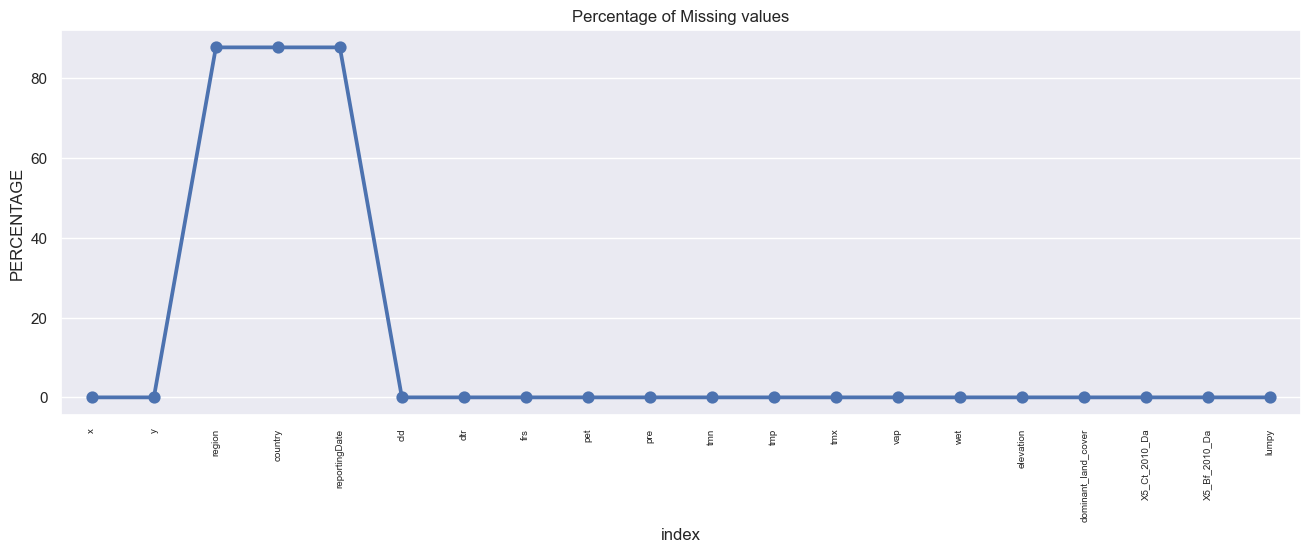

In [124]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: >

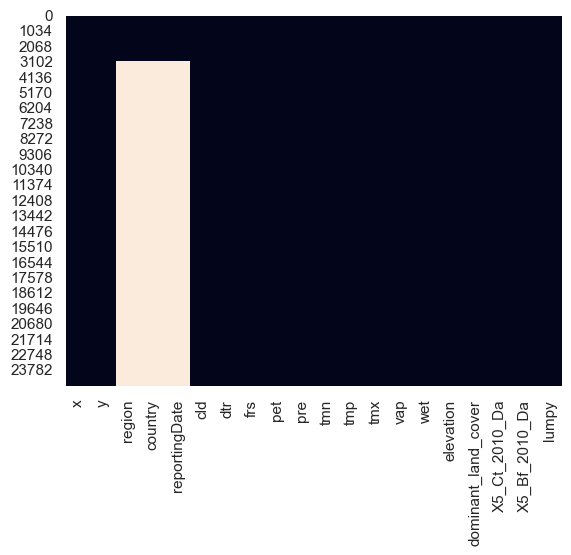

In [125]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [126]:
print("Here are the columnn names of our data set :")
df.columns

Here are the columnn names of our data set :


Index(['x', 'y', 'region', 'country', 'reportingDate', 'cld', 'dtr', 'frs',
       'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation',
       'dominant_land_cover', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da', 'lumpy'],
      dtype='object')

In [127]:
df.lumpy.value_counts()

lumpy
0    21764
1     3039
Name: count, dtype: int64

**There are two categories present in our target column first one is fully paid and it has 318357 observations and second one is charged off and it has 77673 observations**

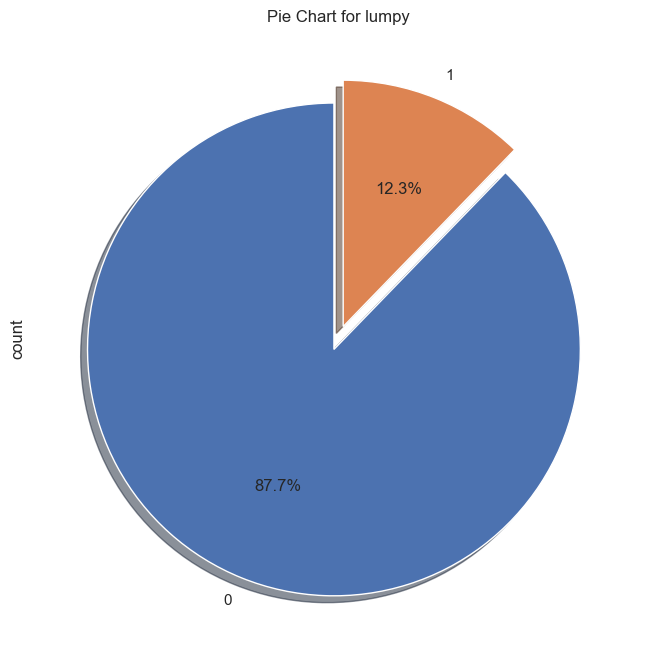

In [128]:
#To get the pie chart to analyze loan_status
df ['lumpy'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for lumpy')
plt.show()

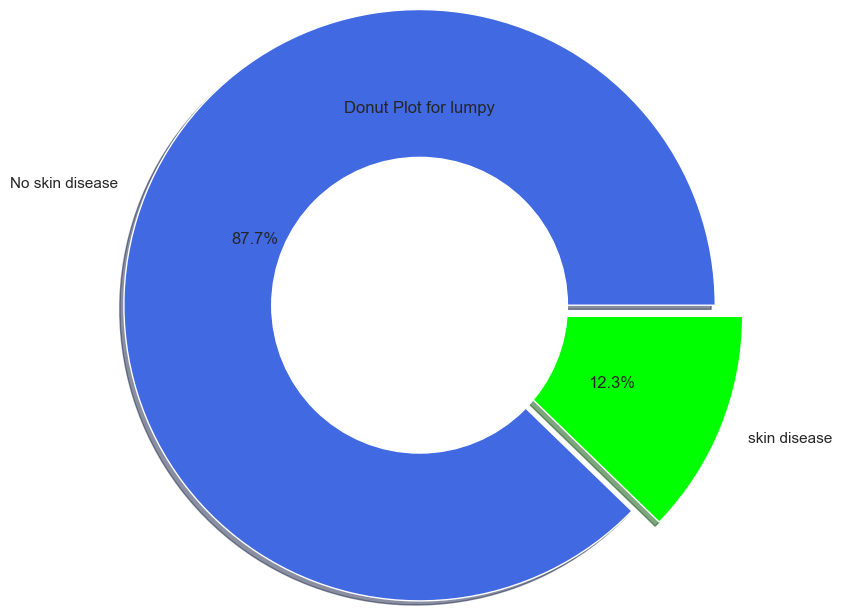

In [129]:
#To get the Donut Plot to analyze loan_status
data1 = df['lumpy'].value_counts()
explode = (0, 0.2)
plt.pie(data1, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No skin disease','skin disease'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for lumpy')
plt.show()

<Axes: xlabel='lumpy', ylabel='count'>

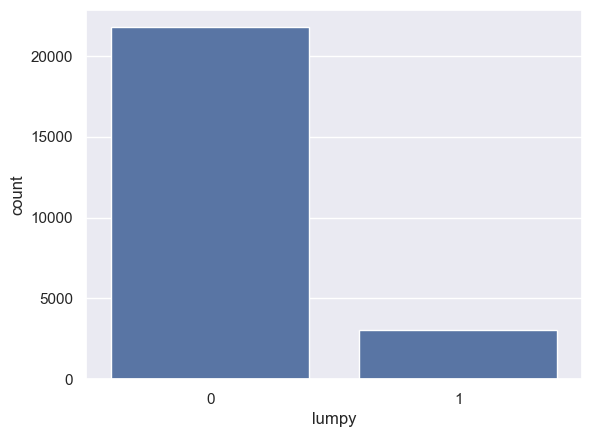

In [130]:
#let's see loan_status by using countplot
sns.countplot(x=df.lumpy)

#### **Let's Analysis the lumpy column**

In [131]:
df.lumpy.value_counts()

lumpy
0    21764
1     3039
Name: count, dtype: int64

In [132]:
df.lumpy.nunique()

2

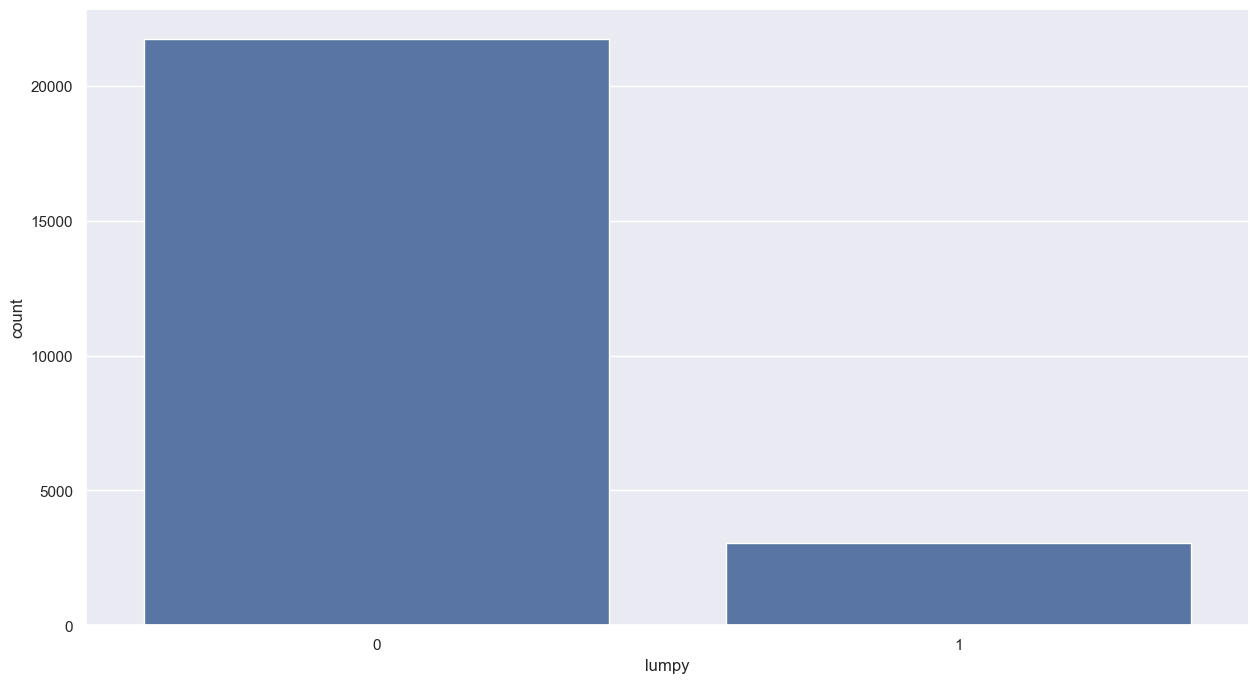

In [133]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='lumpy', data=df)
plt.show()

In [134]:
# !pip install hvplot

In [135]:
import hvplot.pandas
df['lumpy'].value_counts().hvplot.bar(
    title="Lumpy skin disease ", xlabel='No skin disease', ylabel='skin disease',
    width=500, height=350
)

:Bars   [lumpy]   (count)

C:\Users\0945\AppData\Local\Temp\ipykernel_12896\2713983924.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lumpy'])


<Axes: xlabel='lumpy', ylabel='Density'>

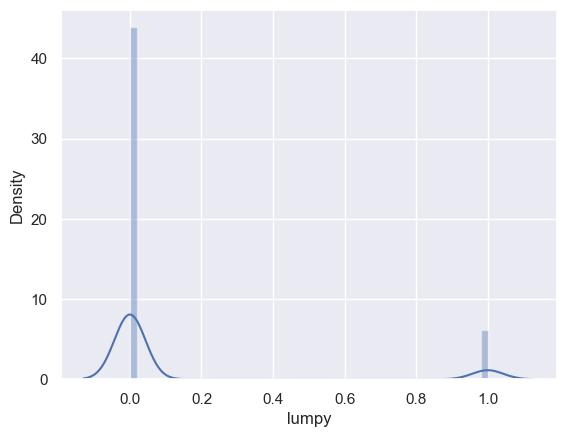

In [136]:
#  distribution plot for lumpy column
sns.distplot(df['lumpy'])

In [137]:
df

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24798,20.250000,-16.750000,NaN,NaN,NaN,68.8,12.0,0.00,3.6,172.0,17.7,23.7,29.7,22.4,15.60,184,3,95.184093,0.000000,0
24799,20.750000,-16.750000,NaN,NaN,NaN,68.8,11.8,0.00,3.6,170.0,18.0,23.9,29.8,23.2,15.70,182,4,111.561489,0.000000,0
24800,21.250000,-16.750000,NaN,NaN,NaN,68.8,11.6,0.00,3.6,167.5,18.3,24.1,29.9,23.9,15.87,178,5,109.733287,0.000000,0
24801,21.750000,-16.750000,NaN,NaN,NaN,68.8,11.5,0.00,3.6,169.5,18.5,24.2,30.0,24.2,16.30,180,3,103.753469,0.000000,0


C:\Users\0945\AppData\Local\Temp\ipykernel_12896\3940142763.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['x'])


<Axes: xlabel='x', ylabel='Density'>

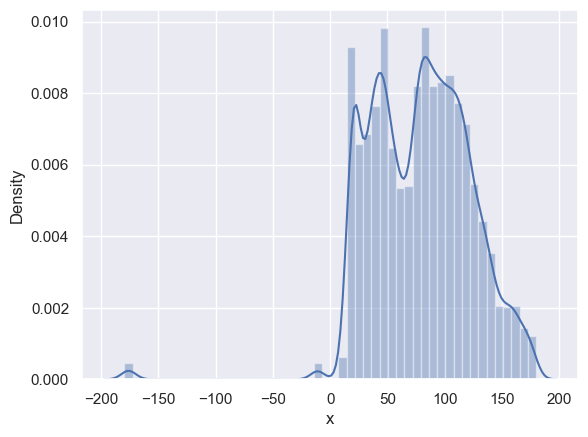

In [138]:
#  distribution plot for x column
sns.distplot(df['x'])

C:\Users\0945\AppData\Local\Temp\ipykernel_12896\4279335835.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['y'])


<Axes: xlabel='y', ylabel='Density'>

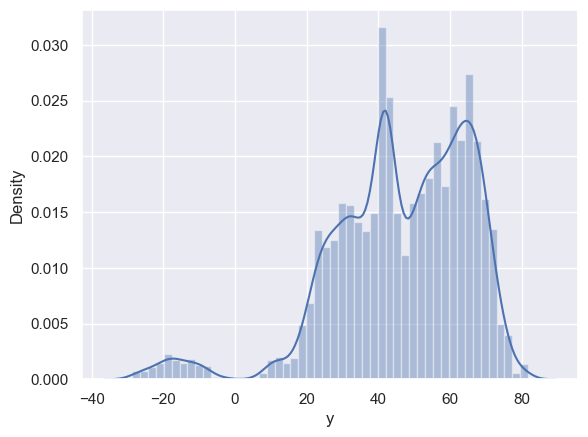

In [139]:
#  distribution plot for y column
sns.distplot(df['y'])

C:\Users\0945\AppData\Local\Temp\ipykernel_12896\28362728.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cld'])


<Axes: xlabel='cld', ylabel='Density'>

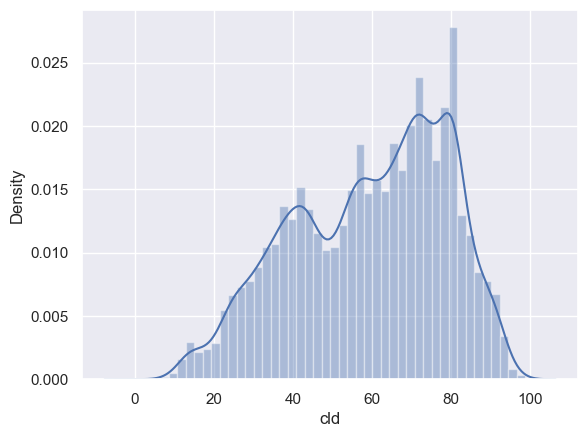

In [140]:
#  distribution plot for cld column
sns.distplot(df['cld'])

C:\Users\0945\AppData\Local\Temp\ipykernel_12896\127024040.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dtr'])


<Axes: xlabel='dtr', ylabel='Density'>

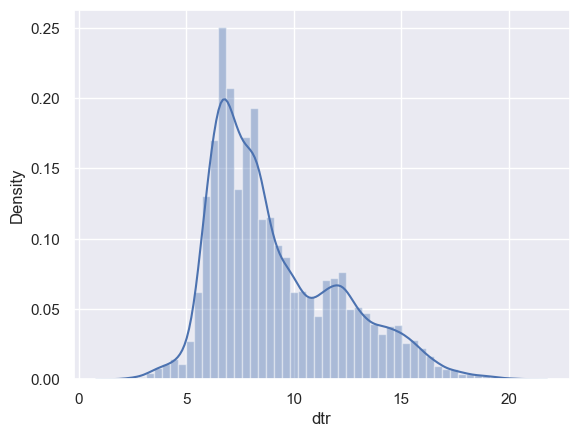

In [141]:
#  distribution plot for dtr column
sns.distplot(df['dtr'])

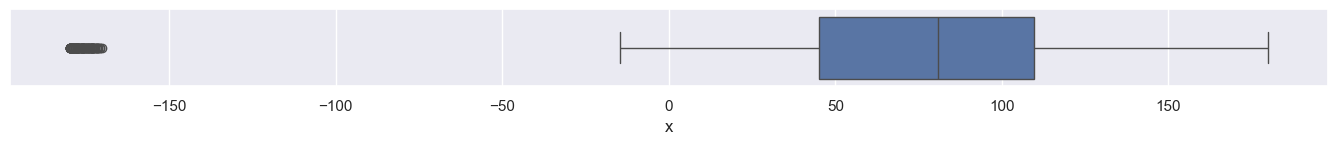

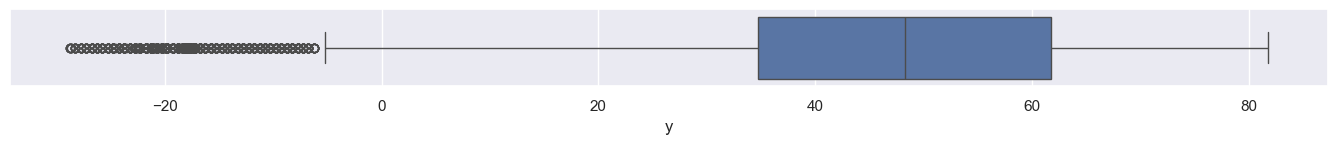

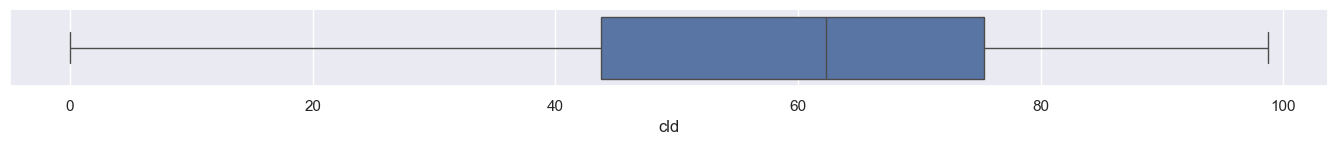

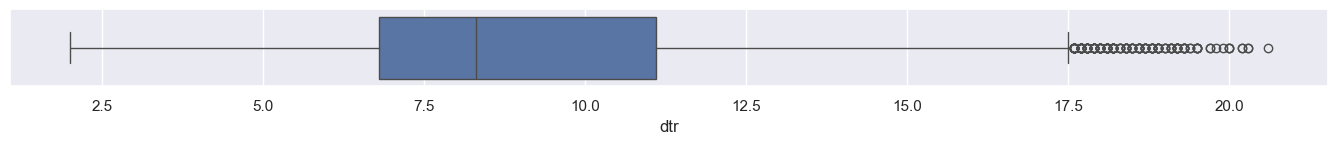

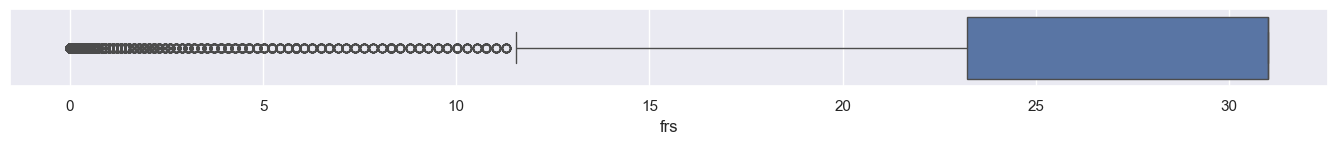

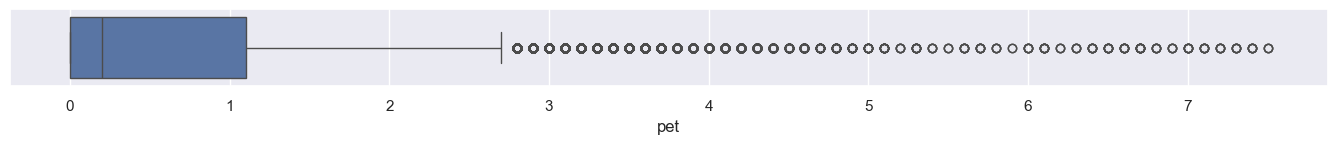

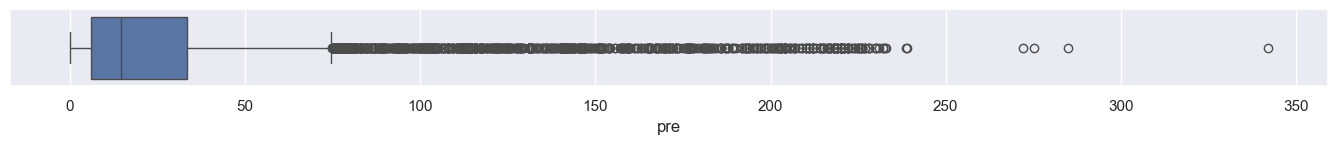

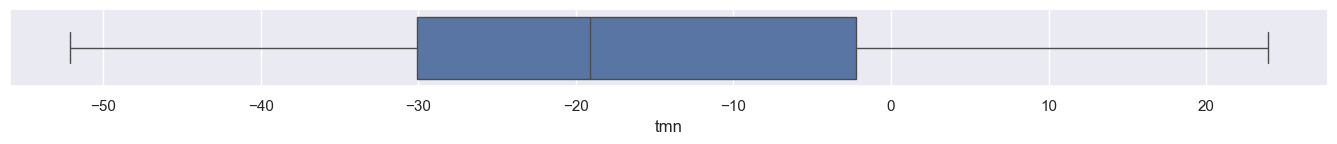

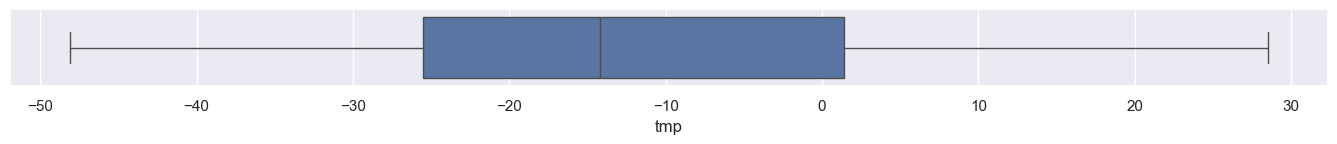

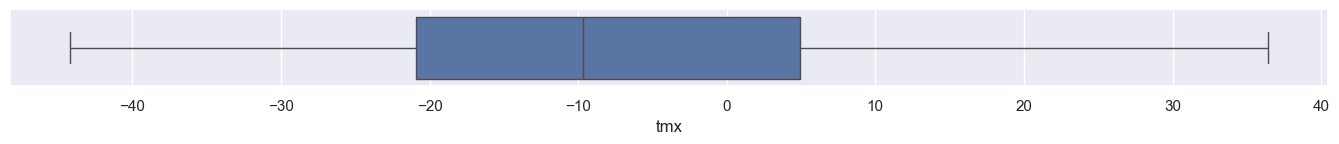

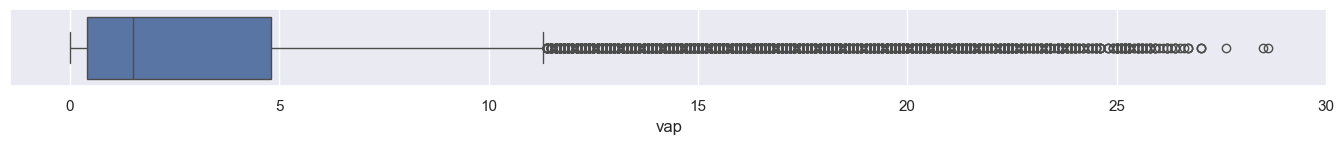

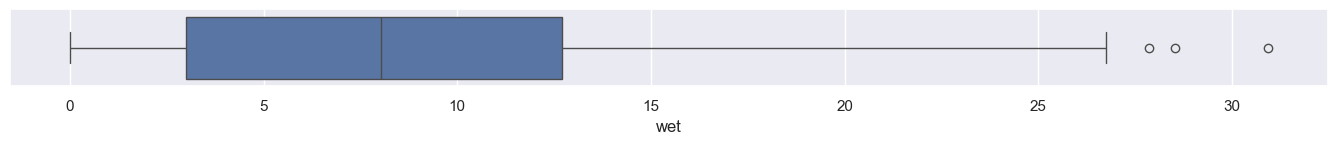

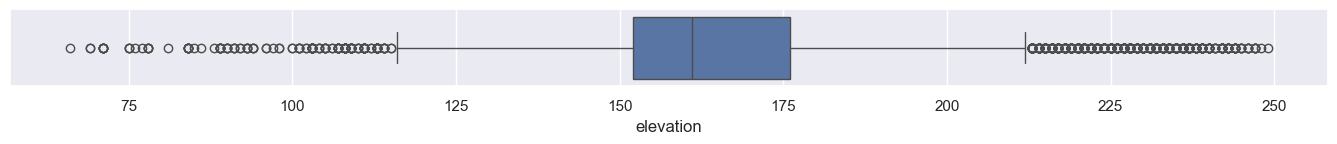

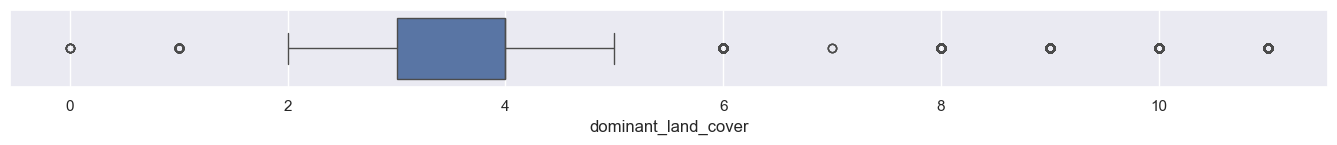

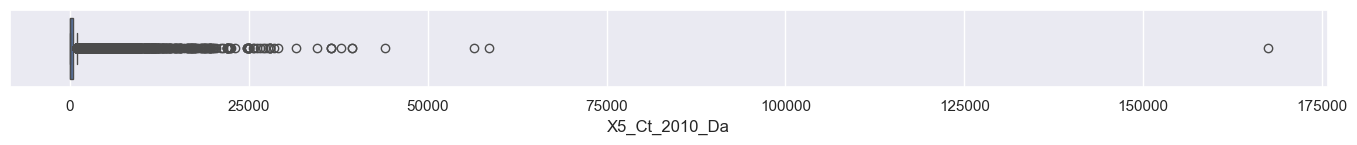

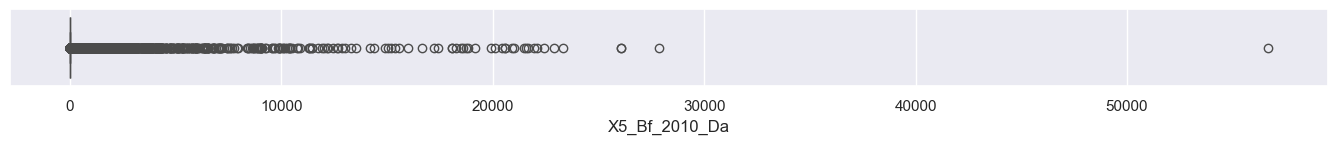

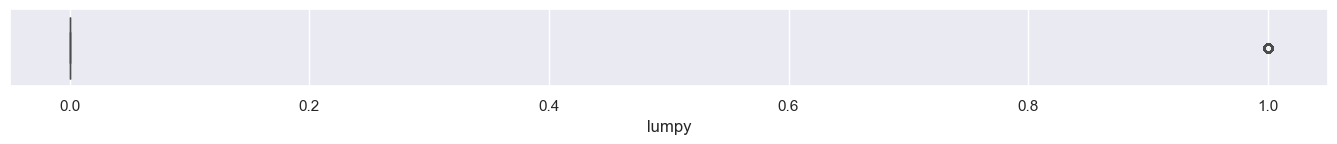

In [142]:
# Univariate Analysis
#Printing boxplot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

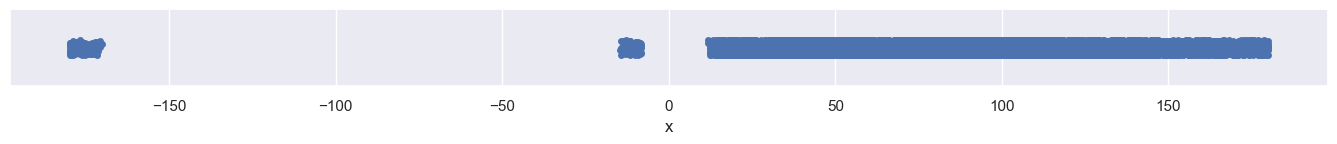

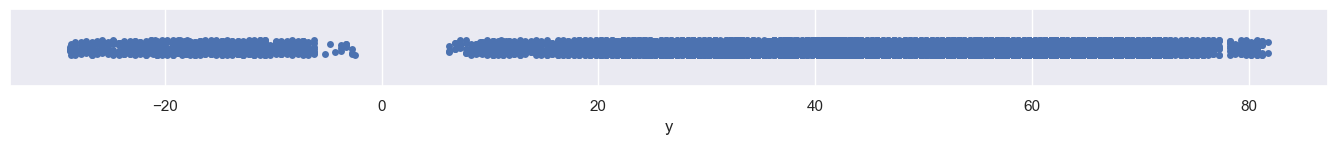

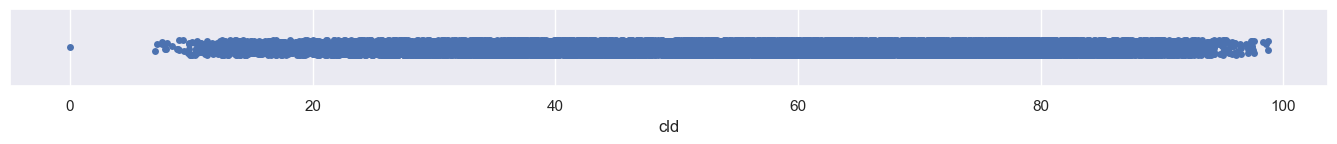

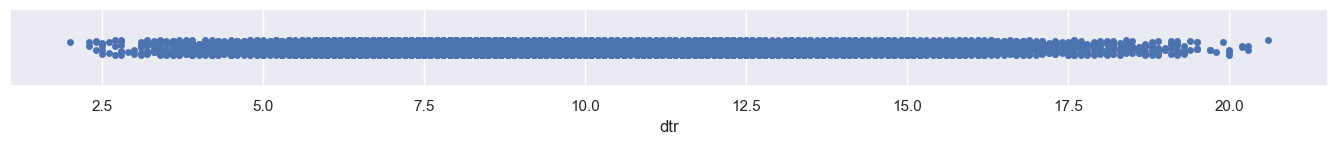

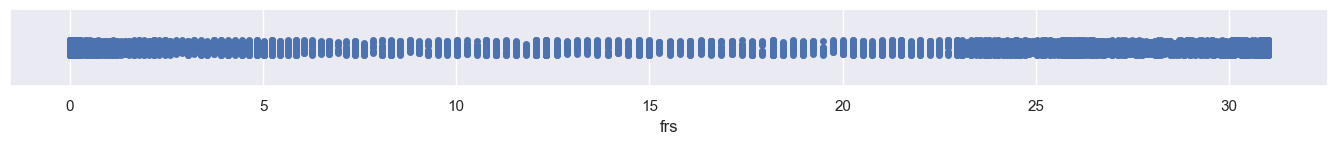

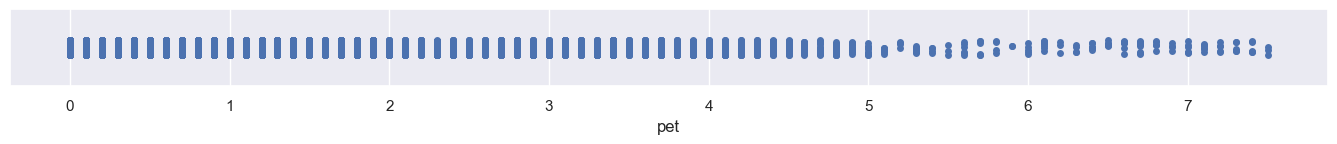

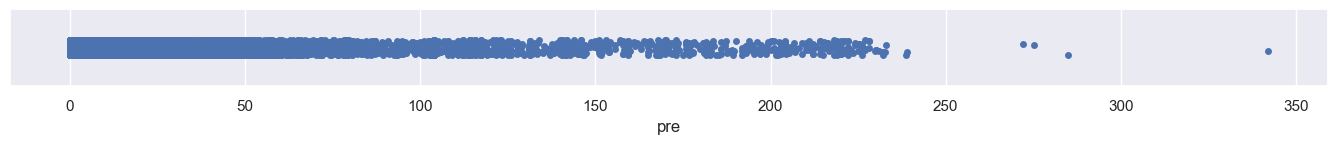

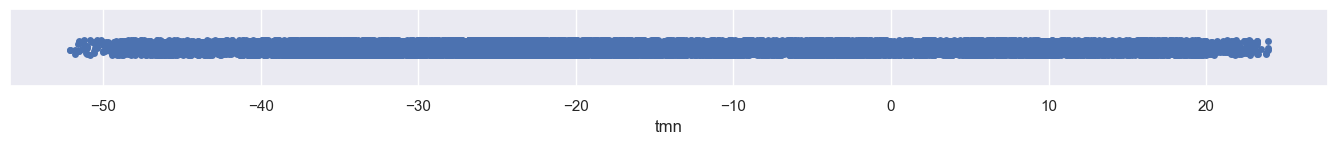

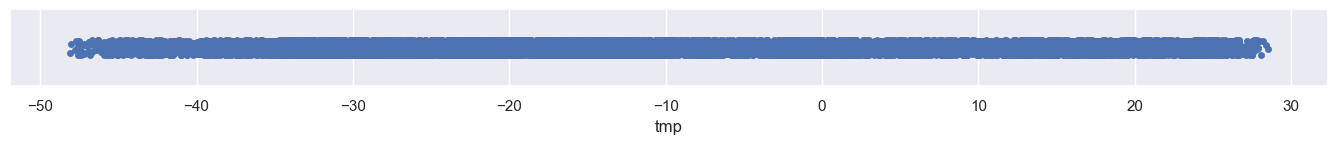

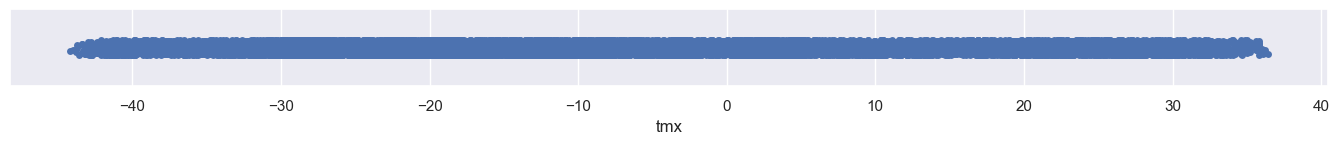

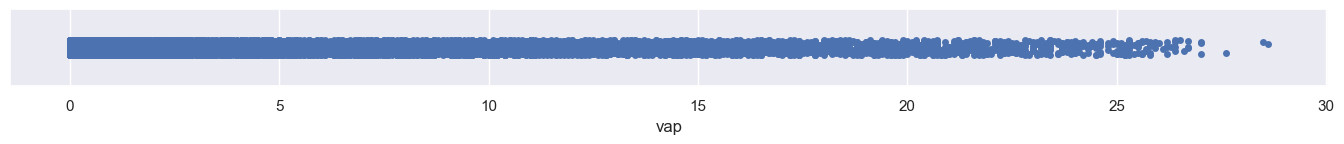

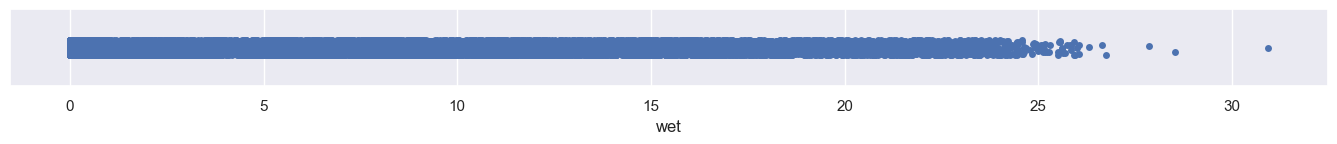

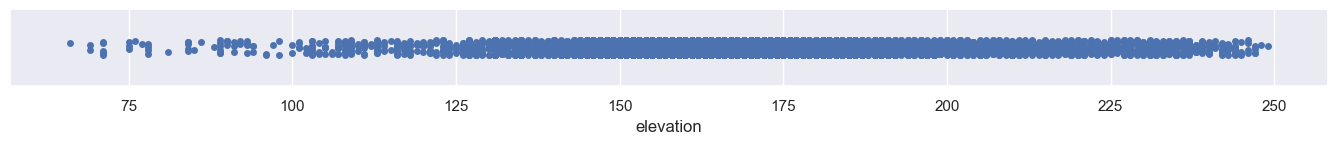

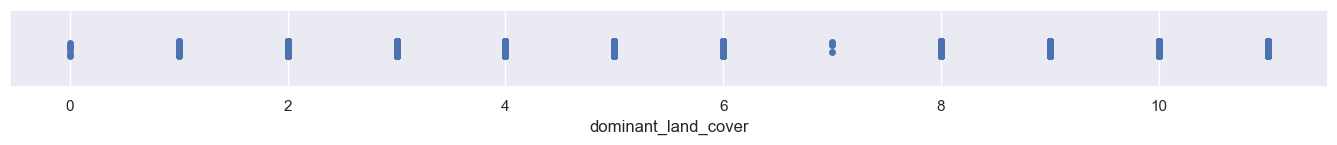

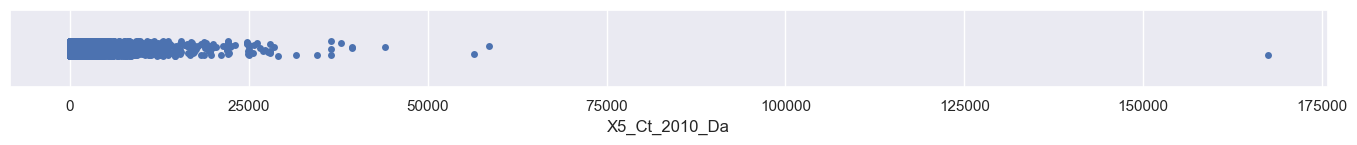

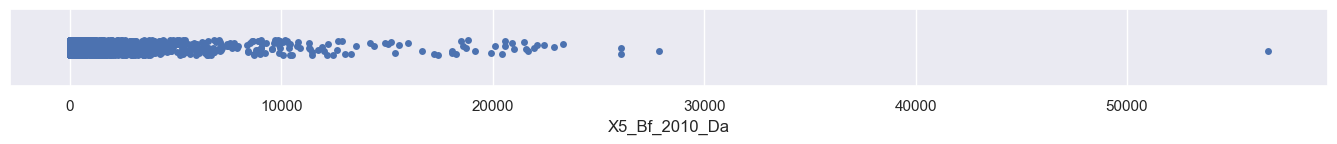

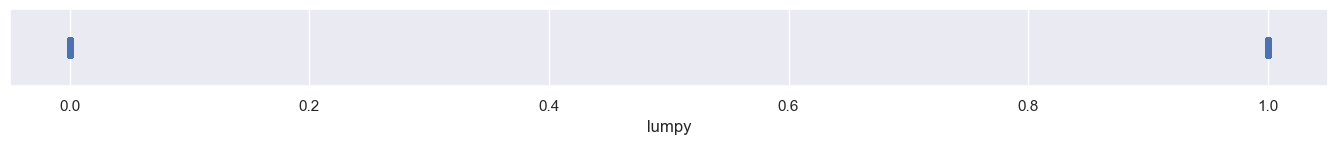

In [143]:
#Printing strip plot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=df1, x=column)
plt.show()

In [144]:
df.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [145]:
df.columns

Index(['x', 'y', 'region', 'country', 'reportingDate', 'cld', 'dtr', 'frs',
       'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation',
       'dominant_land_cover', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da', 'lumpy'],
      dtype='object')

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'cld'}>, <Axes: title={'center': 'dtr'}>],
       [<Axes: title={'center': 'frs'}>, <Axes: title={'center': 'pet'}>,
        <Axes: title={'center': 'pre'}>, <Axes: title={'center': 'tmn'}>],
       [<Axes: title={'center': 'tmp'}>, <Axes: title={'center': 'tmx'}>,
        <Axes: title={'center': 'vap'}>, <Axes: title={'center': 'wet'}>],
       [<Axes: title={'center': 'elevation'}>,
        <Axes: title={'center': 'dominant_land_cover'}>,
        <Axes: title={'center': 'X5_Ct_2010_Da'}>,
        <Axes: title={'center': 'X5_Bf_2010_Da'}>],
       [<Axes: title={'center': 'lumpy'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

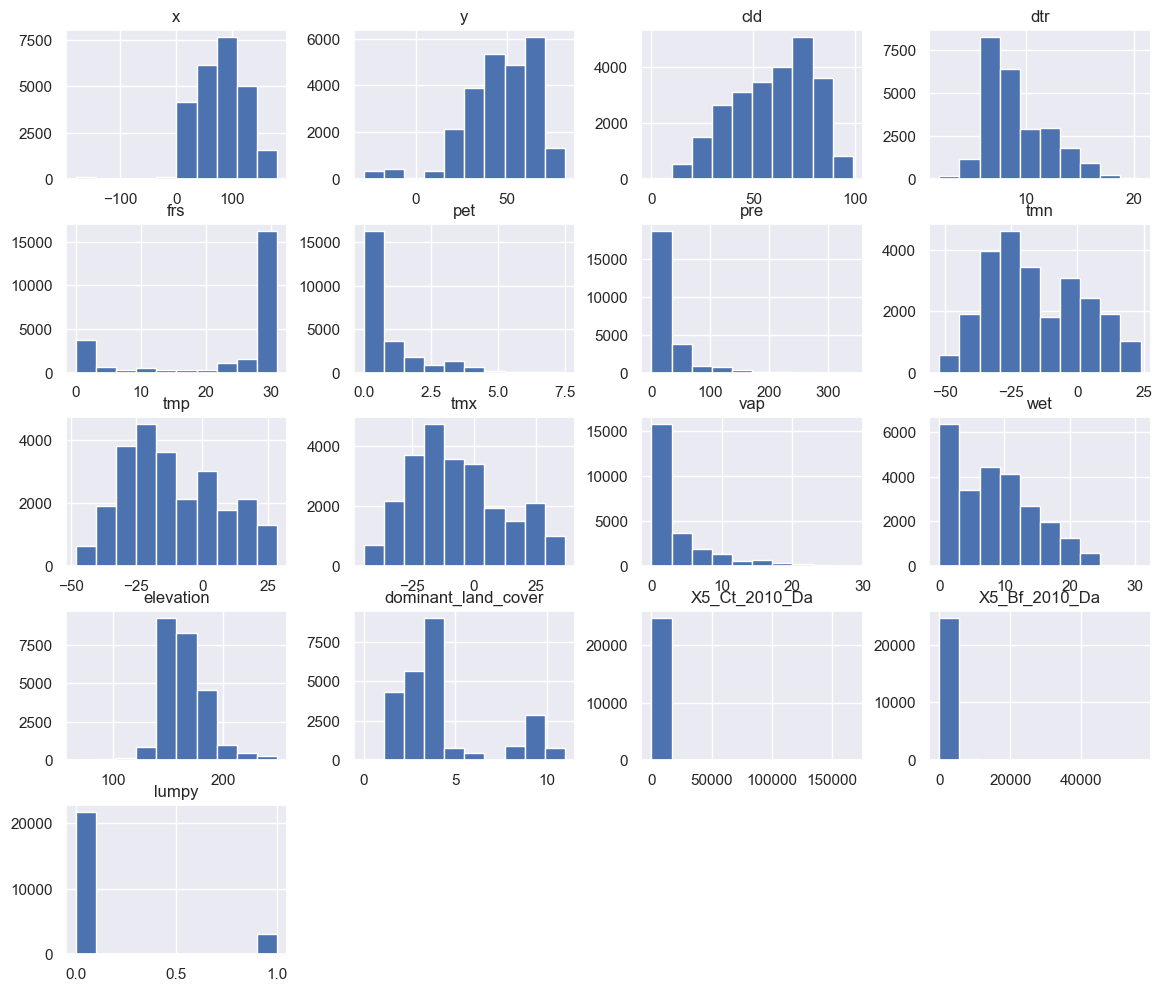

In [146]:
df.hist(figsize = (14,12)) #shows graphically the value counts of each column

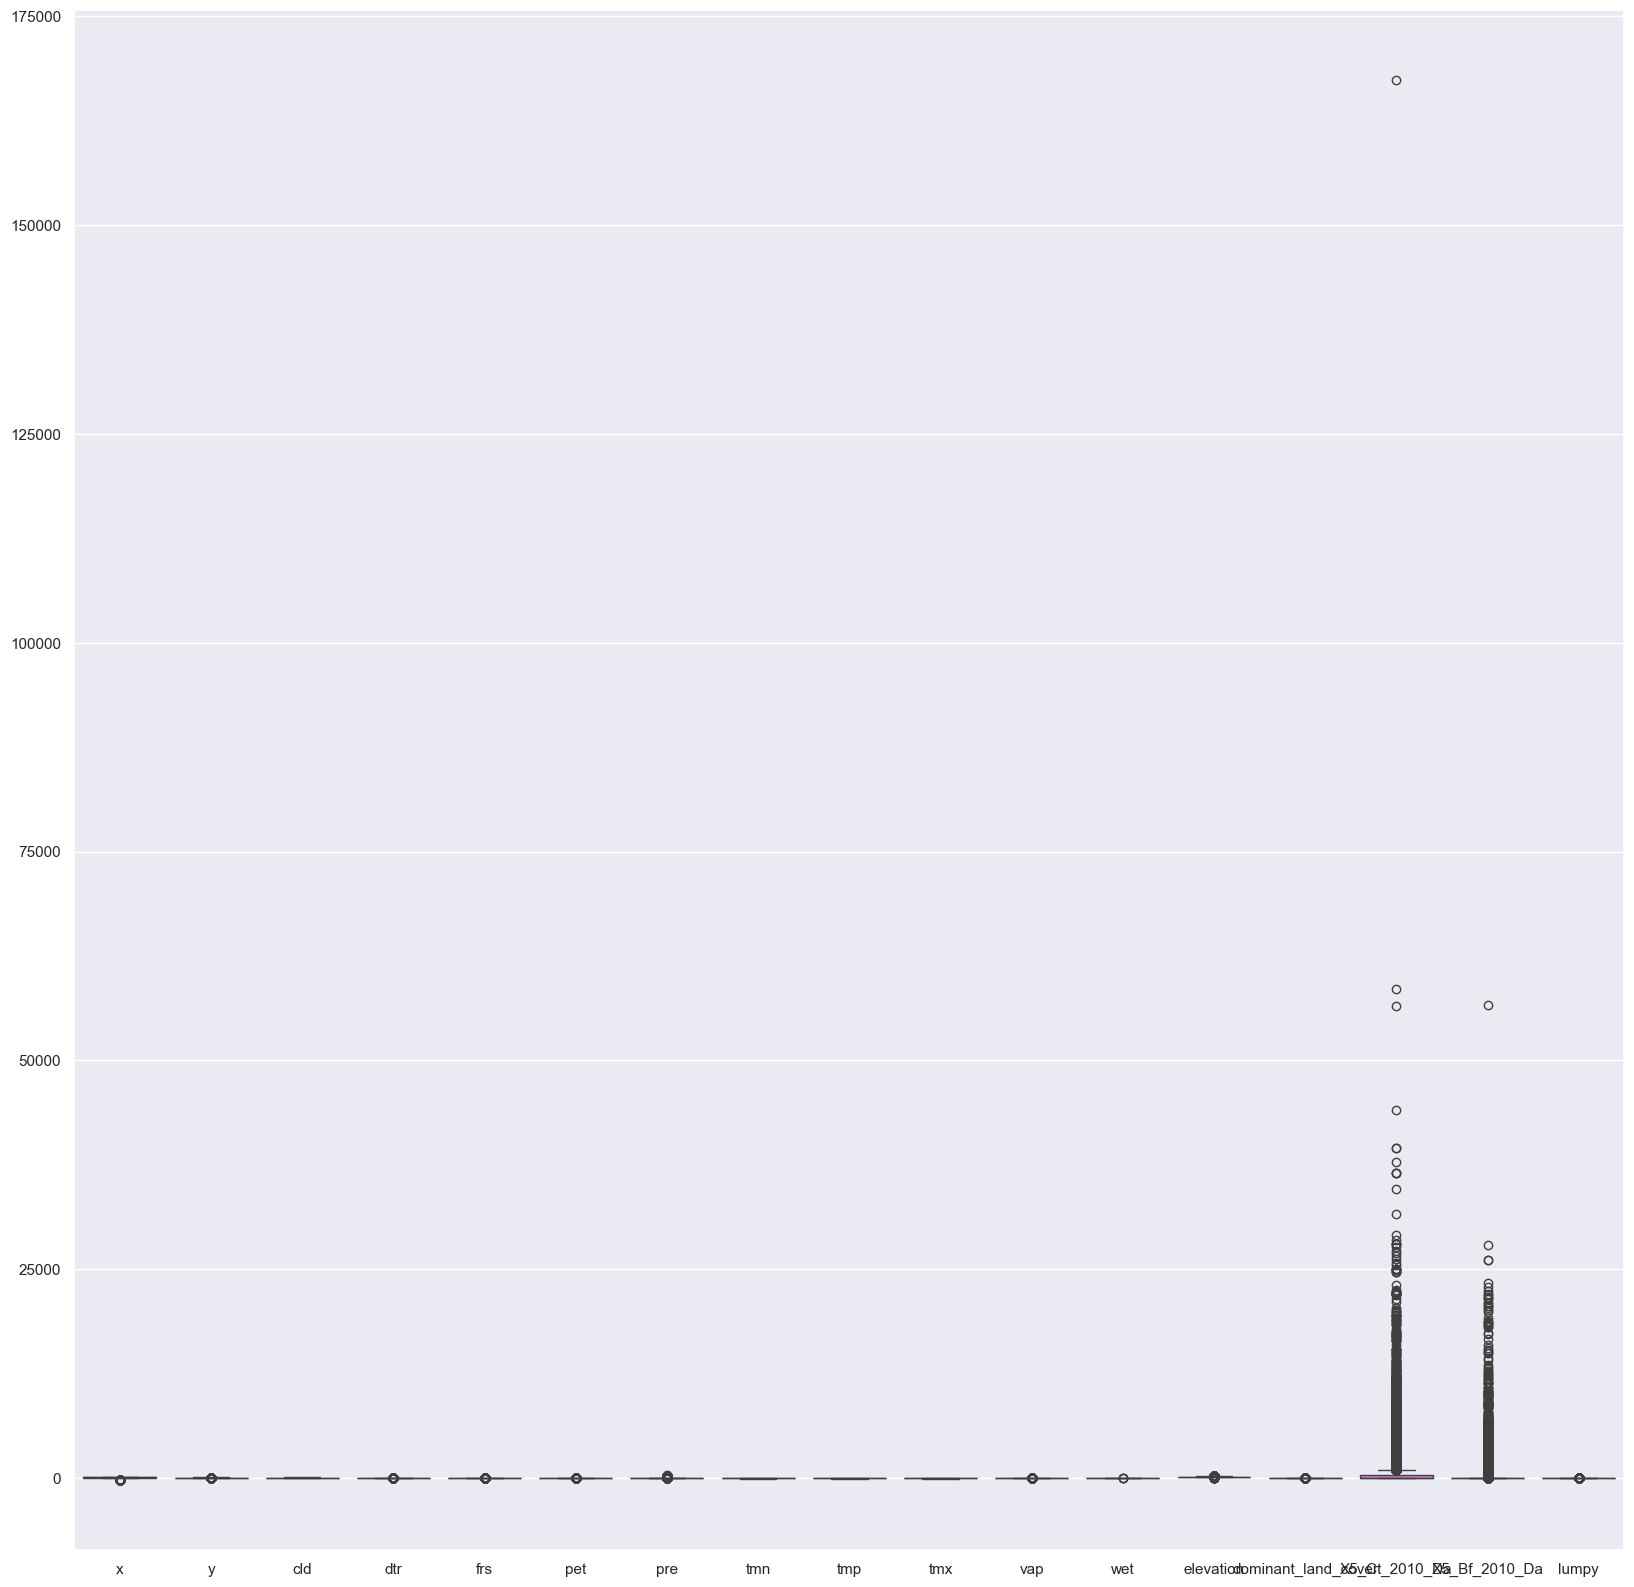

In [147]:
#box plot
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

# **Data Preprocessing**

#### **Missing Value Imputation**

In [148]:
df

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24798,20.250000,-16.750000,NaN,NaN,NaN,68.8,12.0,0.00,3.6,172.0,17.7,23.7,29.7,22.4,15.60,184,3,95.184093,0.000000,0
24799,20.750000,-16.750000,NaN,NaN,NaN,68.8,11.8,0.00,3.6,170.0,18.0,23.9,29.8,23.2,15.70,182,4,111.561489,0.000000,0
24800,21.250000,-16.750000,NaN,NaN,NaN,68.8,11.6,0.00,3.6,167.5,18.3,24.1,29.9,23.9,15.87,178,5,109.733287,0.000000,0
24801,21.750000,-16.750000,NaN,NaN,NaN,68.8,11.5,0.00,3.6,169.5,18.5,24.2,30.0,24.2,16.30,180,3,103.753469,0.000000,0


In [149]:
df.dtypes

x                      float64
y                      float64
region                  object
country                 object
reportingDate           object
cld                    float64
dtr                    float64
frs                    float64
pet                    float64
pre                    float64
tmn                    float64
tmp                    float64
tmx                    float64
vap                    float64
wet                    float64
elevation                int64
dominant_land_cover      int64
X5_Ct_2010_Da          float64
X5_Bf_2010_Da          float64
lumpy                    int64
dtype: object

In [150]:
df['country'].unique()

array(['Bangladesh', 'India', 'China', 'Israel', 'Russian Federation',
       'West Bank', 'Syrian Arab Republic', 'Georgia', 'Namibia',
       'Montenegro', 'Greece', 'Angola', 'Albania', 'Kazakhstan',
       'North Macedonia', 'Serbia', 'Bulgaria', 'Burundi', 'Saudi Arabia',
       'Armenia', 'Cyprus', 'Kuwait', 'Iran  (Islamic Republic of)',
       'Azerbaijan', 'Turkey', 'Egypt', 'Iraq', 'Lebanon', 'Jordan',
       'Guinea', 'Sri Lanka', 'Viet Nam', 'Myanmar', 'Hong Kong, SAR',
       'Djibouti', 'Bhutan', 'Nepal', nan], dtype=object)

In [151]:
print("After the null value imputation the number of missing value count is :")
df.isnull().sum()

After the null value imputation the number of missing value count is :


x                          0
y                          0
region                 21764
country                21764
reportingDate          21764
cld                        0
dtr                        0
frs                        0
pet                        0
pre                        0
tmn                        0
tmp                        0
tmx                        0
vap                        0
wet                        0
elevation                  0
dominant_land_cover        0
X5_Ct_2010_Da              0
X5_Bf_2010_Da              0
lumpy                      0
dtype: int64

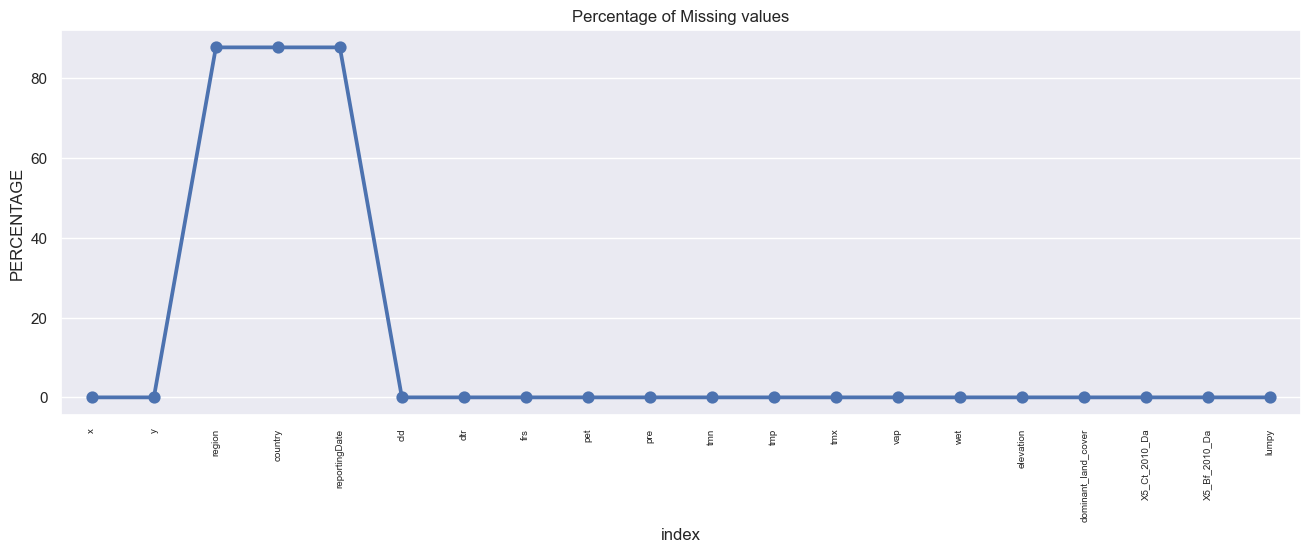

In [152]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: >

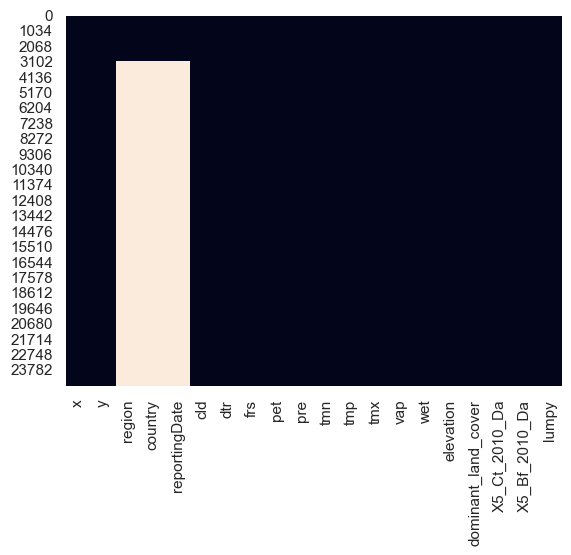

In [153]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

**After Null value Imputation there are no missing value present in our data.**

#### **Labelencoding of Categorical Features**

In [154]:
from sklearn.preprocessing import LabelEncoder
le_region = LabelEncoder()
le_country = LabelEncoder()

In [155]:
df['region'] = le_region.fit_transform(df['region'])
df['country'] = le_country.fit_transform(df['country'])


In [156]:
import joblib
import os

In [157]:
# Create a directory to save the encoders if it doesn't exist
os.makedirs('encoders', exist_ok=True)

# Save the LabelEncoders
joblib.dump(le_region, 'encoders/le_region.pkl')
joblib.dump(le_country, 'encoders/le_country.pkl')

print("LabelEncoders saved successfully.")

LabelEncoders saved successfully.


In [158]:
df.drop(['reportingDate'],axis=1,inplace=True)

In [159]:
df.head()

,x,y,region,country,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,1,4,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,1,16,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,1,16,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,1,8,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,1,8,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [160]:
df['region'].fillna(df['region'].mode()[0], inplace = True)
df['country'].fillna(df['country'].mode()[0], inplace = True)

C:\Users\0945\AppData\Local\Temp\ipykernel_12896\2751933349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].fillna(df['region'].mode()[0], inplace = True)
C:\Users\0945\AppData\Local\Temp\ipykernel_12896\2751933349.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [161]:
df.dtypes

x                      float64
y                      float64
region                   int32
country                  int32
cld                    float64
dtr                    float64
frs                    float64
pet                    float64
pre                    float64
tmn                    float64
tmp                    float64
tmx                    float64
vap                    float64
wet                    float64
elevation                int64
dominant_land_cover      int64
X5_Ct_2010_Da          float64
X5_Bf_2010_Da          float64
lumpy                    int64
dtype: object

**Here after applying the Label Encoder all the categorical columns has been converted into numeric.**

#### **Feature Selection**

Let's plot the correlation plot to select the features

<Axes: >

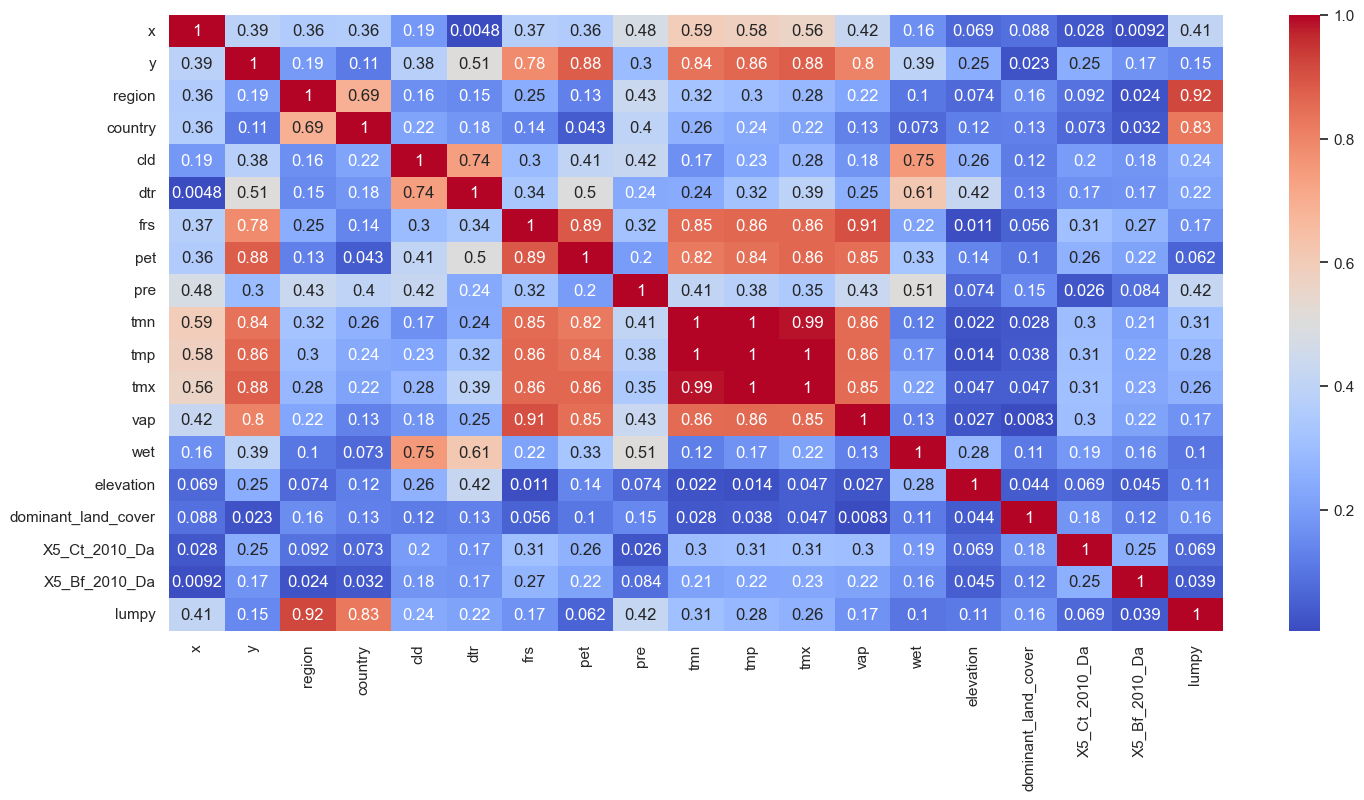

In [162]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Let's save the correlation value in csv format

In [163]:
corr = df.corr()

In [164]:
corr

,x,y,region,country,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
x,1.000000,0.387501,0.355886,0.361262,-0.187324,0.004775,0.370836,-0.358457,-0.478733,-0.594490,-0.580375,-0.563327,-0.424080,-0.164079,0.069367,-0.087905,-0.028277,0.009231,-0.408407
y,0.387501,1.000000,0.193303,0.111919,0.375184,-0.508181,0.783018,-0.879845,-0.295240,-0.839350,-0.861948,-0.878246,-0.804888,0.392614,-0.247528,-0.022575,-0.248816,-0.173256,-0.146576
region,0.355886,0.193303,1.000000,0.690040,-0.163742,0.148808,0.246836,-0.127331,-0.433935,-0.321555,-0.301670,-0.281217,-0.222716,-0.103965,0.073524,0.157185,-0.091619,0.023930,-0.920090
country,0.361262,0.111919,0.690040,1.000000,-0.219701,0.179991,0.138565,-0.043473,-0.399201,-0.258727,-0.237736,-0.216630,-0.131097,-0.073174,0.122523,0.128094,-0.072749,0.031994,-0.826448
cld,-0.187324,0.375184,-0.163742,-0.219701,1.000000,-0.738746,0.295737,-0.406114,0.424070,-0.167758,-0.225039,-0.278082,-0.177241,0.749386,-0.262220,-0.116746,-0.197311,-0.177610,0.237754
dtr,0.004775,-0.508181,0.148808,0.179991,-0.738746,1.000000,-0.338221,0.503055,-0.235839,0.241513,0.318798,0.390182,0.252225,-0.611676,0.422791,0.126460,0.165909,0.168894,-0.216253
frs,0.370836,0.783018,0.246836,0.138565,0.295737,-0.338221,1.000000,-0.888834,-0.316535,-0.853125,-0.861009,-0.863749,-0.905936,0.217203,-0.011161,-0.056338,-0.310945,-0.270867,-0.172834
pet,-0.358457,-0.879845,-0.127331,-0.043473,-0.406114,0.503055,-0.888834,1.000000,0.195620,0.821891,0.844336,0.860752,0.845909,-0.330310,0.138186,0.103978,0.257481,0.218159,0.061748
pre,-0.478733,-0.295240,-0.433935,-0.399201,0.424070,-0.235839,-0.316535,0.195620,1.000000,0.406589,0.377515,0.347758,0.428686,0.507761,-0.073501,-0.147926,-0.026248,-0.084029,0.419686
tmn,-0.594490,-0.839350,-0.321555,-0.258727,-0.167758,0.241513,-0.853125,0.821891,0.406589,1.000000,0.996758,0.987715,0.855783,-0.122820,-0.022032,0.028129,0.300226,0.213895,0.308560


In [165]:
# corr.to_csv('correlation.csv')

In [166]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

In [167]:
corr_matrix

,x,y,region,country,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
x,1.000000,0.387501,0.355886,0.361262,0.187324,0.004775,0.370836,0.358457,0.478733,0.594490,0.580375,0.563327,0.424080,0.164079,0.069367,0.087905,0.028277,0.009231,0.408407
y,0.387501,1.000000,0.193303,0.111919,0.375184,0.508181,0.783018,0.879845,0.295240,0.839350,0.861948,0.878246,0.804888,0.392614,0.247528,0.022575,0.248816,0.173256,0.146576
region,0.355886,0.193303,1.000000,0.690040,0.163742,0.148808,0.246836,0.127331,0.433935,0.321555,0.301670,0.281217,0.222716,0.103965,0.073524,0.157185,0.091619,0.023930,0.920090
country,0.361262,0.111919,0.690040,1.000000,0.219701,0.179991,0.138565,0.043473,0.399201,0.258727,0.237736,0.216630,0.131097,0.073174,0.122523,0.128094,0.072749,0.031994,0.826448
cld,0.187324,0.375184,0.163742,0.219701,1.000000,0.738746,0.295737,0.406114,0.424070,0.167758,0.225039,0.278082,0.177241,0.749386,0.262220,0.116746,0.197311,0.177610,0.237754
dtr,0.004775,0.508181,0.148808,0.179991,0.738746,1.000000,0.338221,0.503055,0.235839,0.241513,0.318798,0.390182,0.252225,0.611676,0.422791,0.126460,0.165909,0.168894,0.216253
frs,0.370836,0.783018,0.246836,0.138565,0.295737,0.338221,1.000000,0.888834,0.316535,0.853125,0.861009,0.863749,0.905936,0.217203,0.011161,0.056338,0.310945,0.270867,0.172834
pet,0.358457,0.879845,0.127331,0.043473,0.406114,0.503055,0.888834,1.000000,0.195620,0.821891,0.844336,0.860752,0.845909,0.330310,0.138186,0.103978,0.257481,0.218159,0.061748
pre,0.478733,0.295240,0.433935,0.399201,0.424070,0.235839,0.316535,0.195620,1.000000,0.406589,0.377515,0.347758,0.428686,0.507761,0.073501,0.147926,0.026248,0.084029,0.419686
tmn,0.594490,0.839350,0.321555,0.258727,0.167758,0.241513,0.853125,0.821891,0.406589,1.000000,0.996758,0.987715,0.855783,0.122820,0.022032,0.028129,0.300226,0.213895,0.308560


In [168]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,x,y,region,country,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
x,NaN,0.387501,0.355886,0.361262,0.187324,0.004775,0.370836,0.358457,0.478733,0.594490,0.580375,0.563327,0.424080,0.164079,0.069367,0.087905,0.028277,0.009231,0.408407
y,NaN,NaN,0.193303,0.111919,0.375184,0.508181,0.783018,0.879845,0.295240,0.839350,0.861948,0.878246,0.804888,0.392614,0.247528,0.022575,0.248816,0.173256,0.146576
region,NaN,NaN,NaN,0.690040,0.163742,0.148808,0.246836,0.127331,0.433935,0.321555,0.301670,0.281217,0.222716,0.103965,0.073524,0.157185,0.091619,0.023930,0.920090
country,NaN,NaN,NaN,NaN,0.219701,0.179991,0.138565,0.043473,0.399201,0.258727,0.237736,0.216630,0.131097,0.073174,0.122523,0.128094,0.072749,0.031994,0.826448
cld,NaN,NaN,NaN,NaN,NaN,0.738746,0.295737,0.406114,0.424070,0.167758,0.225039,0.278082,0.177241,0.749386,0.262220,0.116746,0.197311,0.177610,0.237754
dtr,NaN,NaN,NaN,NaN,NaN,NaN,0.338221,0.503055,0.235839,0.241513,0.318798,0.390182,0.252225,0.611676,0.422791,0.126460,0.165909,0.168894,0.216253
frs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.888834,0.316535,0.853125,0.861009,0.863749,0.905936,0.217203,0.011161,0.056338,0.310945,0.270867,0.172834
pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.195620,0.821891,0.844336,0.860752,0.845909,0.330310,0.138186,0.103978,0.257481,0.218159,0.061748
pre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.406589,0.377515,0.347758,0.428686,0.507761,0.073501,0.147926,0.026248,0.084029,0.419686
tmn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996758,0.987715,0.855783,0.122820,0.022032,0.028129,0.300226,0.213895,0.308560


In [169]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.30)]

In [170]:
to_drop


['y',
 'region',
 'country',
 'cld',
 'dtr',
 'frs',
 'pet',
 'pre',
 'tmn',
 'tmp',
 'tmx',
 'vap',
 'wet',
 'elevation',
 'X5_Ct_2010_Da',
 'lumpy']

So here as per the correlation values we have selected the above features to train our model

In [171]:

final_data = df[['y',
 'region',
 'country',
 'cld',
 'dtr',
 'frs',
 'pet',
 'pre',
 'tmn',
 'tmp',
 'tmx',
 'vap',
 'wet',
 'elevation',
 'X5_Ct_2010_Da',
 'lumpy']]

In [172]:
final_data.head()

,y,region,country,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,X5_Ct_2010_Da,lumpy
0,22.437184,1,4,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,27970.983100,1
1,22.986757,1,16,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,25063.646690,1
2,23.610181,1,16,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,6038.477155,1
3,43.882221,1,8,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,760.703340,1
4,43.834976,1,8,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,270.367426,1


In [173]:
final_data.shape

(24803, 16)

In [174]:
final_data.columns

Index(['y', 'region', 'country', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn',
       'tmp', 'tmx', 'vap', 'wet', 'elevation', 'X5_Ct_2010_Da', 'lumpy'],
      dtype='object')

In [175]:
# final_data.to_csv('correlation.csv')

#### **Splitting of data into train and test**

In [176]:
x = final_data.drop(['lumpy'], axis=1)
y = final_data['lumpy']

In [177]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,stratify=y, random_state= 42)

In [178]:
x_test

,y,region,country,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,X5_Ct_2010_Da
24409,40.250000,3,37,68.5,7.6,12.86,0.8,19.8,1.9,5.7,9.5,7.0,7.31,146,5430.952747
12333,58.750000,3,37,74.5,6.1,31.00,0.0,47.4,-16.2,-13.1,-10.1,2.3,23.83,156,84.685206
17682,45.250000,3,37,65.6,9.7,30.99,0.4,10.4,-13.6,-8.7,-3.9,2.6,7.07,155,65.614565
16485,49.750000,3,37,53.6,7.1,31.00,0.2,41.1,-18.3,-14.7,-11.2,1.7,11.25,144,2.489224
11033,61.250000,3,37,73.2,6.4,31.00,0.0,47.4,-17.8,-14.6,-11.4,1.9,17.95,159,5.078644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19566,36.750000,3,37,53.0,10.7,27.50,1.6,14.9,-6.3,-0.9,4.5,1.6,5.38,179,415.470448
18377,42.750000,3,37,73.3,6.1,24.82,0.8,83.2,-3.6,-0.5,2.6,4.1,9.54,186,394.360041
8591,65.750000,3,37,94.3,7.9,31.00,0.0,21.3,-37.7,-33.7,-29.8,0.3,20.92,158,1.497332
3514,37.250000,3,37,62.2,9.4,15.52,1.1,59.8,0.9,5.6,10.3,6.5,9.96,168,584.530663


In [179]:
y_test

24409    0
12333    0
17682    0
16485    0
11033    0
        ..
19566    0
18377    0
8591     0
3514     0
124      1
Name: lumpy, Length: 7441, dtype: int64

# **Model Building**

# import algorithms

In [180]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

# ExtraTreeClassifier

In [181]:
classifier_ex = ExtraTreeClassifier(ccp_alpha=0.4)
classifier_ex.fit(x_train,y_train)

ExtraTreeClassifier(ccp_alpha=0.4)

In [182]:
pred_ex = classifier_ex.predict(x_test)

In [183]:
acc_ex = accuracy_score(pred_ex,y_test)
acc_ex

0.8774358285176723

In [184]:
#Printing the Classification report for ExtraTreeClassifier classifier model
print('The classificatin report for ExtraTreeClassifier classifier as follows:')
report  = classification_report(pred_ex,y_test)
print(report)

The classificatin report for ExtraTreeClassifier classifier as follows:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      7441
           1       0.00      0.00      0.00         0

    accuracy                           0.88      7441
   macro avg       0.50      0.44      0.47      7441
weighted avg       1.00      0.88      0.93      7441



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,pred_ex)}')

Here is the confusion matrix of the model 
 
 [[6529    0]
 [ 912    0]]


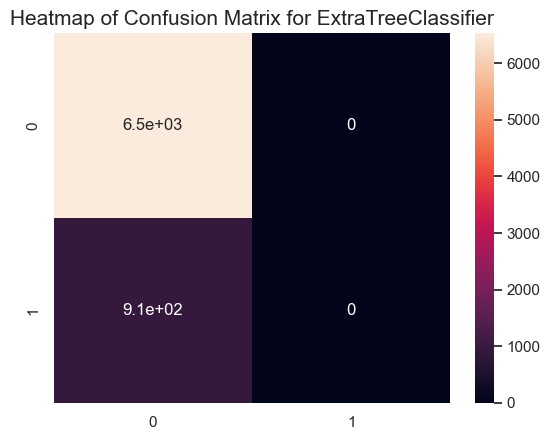

In [186]:
#confustion metrix
cm = confusion_matrix(y_test, pred_ex)
plt.title('Heatmap of Confusion Matrix for ExtraTreeClassifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

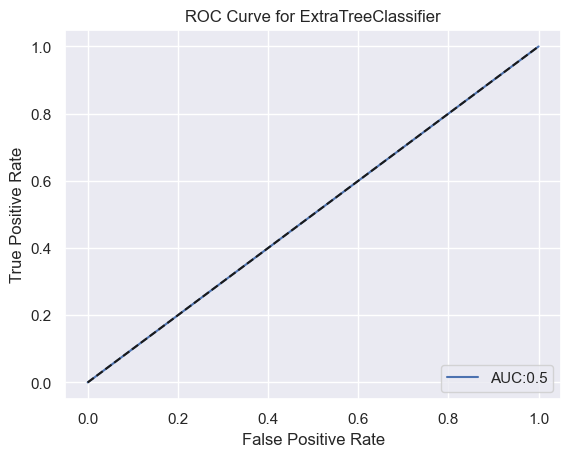

In [187]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,pred_ex)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,pred_ex)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ExtraTreeClassifier')
plt.legend(loc='lower right')
plt.show()

# MLPClassifier

In [188]:
classifier_mlp = MLPClassifier()
classifier_mlp.fit(x_train,y_train)

MLPClassifier()

In [189]:
pred_mlp = classifier_mlp.predict(x_test)

In [190]:
acc_mlp = accuracy_score(pred_mlp,y_test)
acc_mlp

0.9633113828786454

In [191]:
#Printing the Classification report for MLPClassifier classifier model
print('The classificatin report for MLPClassifier classifier as follows:')
report  = classification_report(pred_mlp,y_test)
print(report)

The classificatin report for MLPClassifier classifier as follows:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6802
           1       0.70      1.00      0.82       639

    accuracy                           0.96      7441
   macro avg       0.85      0.98      0.90      7441
weighted avg       0.97      0.96      0.97      7441



In [192]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,pred_mlp)}')

Here is the confusion matrix of the model 
 
 [[6529    0]
 [ 273  639]]


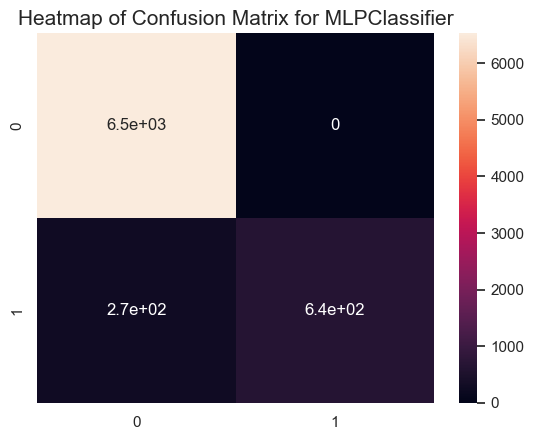

In [193]:
#confustion metrix
cm = confusion_matrix(y_test, pred_mlp)
plt.title('Heatmap of Confusion Matrix for MLPClassifier', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

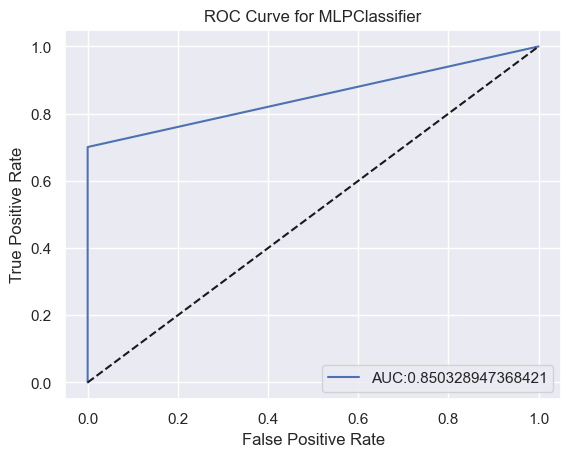

In [194]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,pred_mlp)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,pred_mlp)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLPClassifier')
plt.legend(loc='lower right')
plt.show()

# GaussianNB

In [195]:
classifier_nb = GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB()

In [196]:
pred_nb = classifier_nb.predict(x_test)

In [197]:
acc_nb = accuracy_score(pred_nb,y_test)
acc_nb

0.9982529229942212

In [198]:
#Printing the Classification report for GaussianNB classifier model
print('The classificatin report for GaussianNB classifier as follows:')
report  = classification_report(pred_nb,y_test)
print(report)

The classificatin report for GaussianNB classifier as follows:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6516
           1       1.00      0.99      0.99       925

    accuracy                           1.00      7441
   macro avg       1.00      0.99      1.00      7441
weighted avg       1.00      1.00      1.00      7441



In [199]:
# printing the confusion matrix
print(f'Here is the confusion matrix of the model \n \n {confusion_matrix(y_test,pred_nb)}')

Here is the confusion matrix of the model 
 
 [[6516   13]
 [   0  912]]


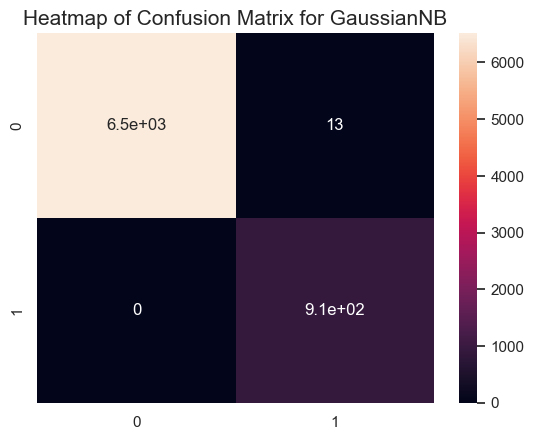

In [200]:
#confustion metrix
cm = confusion_matrix(y_test, pred_nb)
plt.title('Heatmap of Confusion Matrix for GaussianNB', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

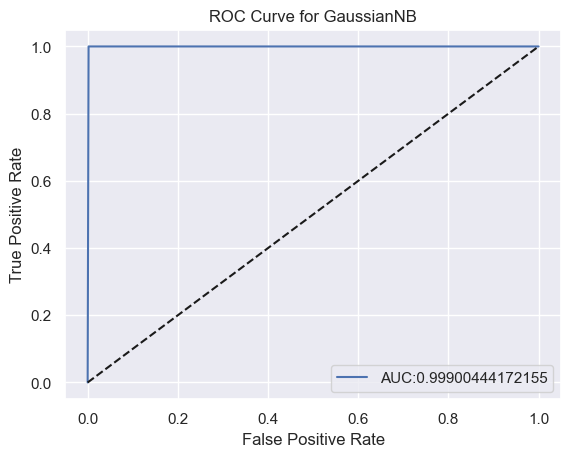

In [201]:
# plot the roc curve for the model with roc score adn the model name inside the plot
fpr,tpr,thresholds = roc_curve(y_test,pred_nb)
plt.plot(fpr,tpr,label=f'AUC:{roc_auc_score(y_test,pred_nb)}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB')
plt.legend(loc='lower right')
plt.show()

# Accuracy plot

In [202]:
graph5 = pd.DataFrame({'Models':['ExtraTreeClassifier','MLPClassifier','GaussianNB'],'Accuracy':[acc_ex*100,acc_mlp*100,acc_nb*100]})
graph5

,Models,Accuracy
0,ExtraTreeClassifier,87.743583
1,MLPClassifier,96.331138
2,GaussianNB,99.825292


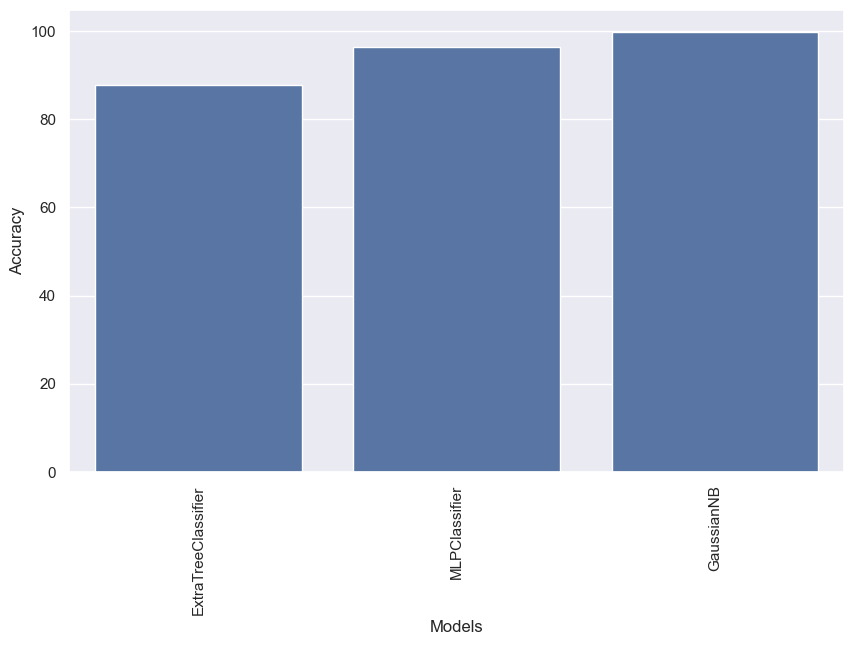

In [203]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph5.Accuracy,x = graph5.Models)
plt.xticks(rotation = 'vertical')
plt.show()

# Prediction 

In [204]:
final_data[final_data['lumpy']==1]

,y,region,country,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,X5_Ct_2010_Da,lumpy
0,22.437184,1,4,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,27970.983100,1
1,22.986757,1,16,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,25063.646690,1
2,23.610181,1,16,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,6038.477155,1
3,43.882221,1,8,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,760.703340,1
4,43.834976,1,8,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,270.367426,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,27.093860,1,8,79.5,4.2,16.06,1.3,39.0,0.7,2.8,4.9,4.6,10.54,186,542.848939,1
3035,24.441660,1,8,72.4,5.8,1.91,1.8,10.0,7.1,10.0,12.9,8.5,5.03,145,985.615195,1
3036,25.936111,1,8,78.6,5.6,10.78,1.5,25.6,2.7,5.5,8.3,5.2,8.17,168,2034.519772,1
3037,25.536671,1,8,78.4,6.5,11.04,1.5,23.9,2.6,5.8,9.1,5.6,7.88,175,727.388390,1


In [205]:
result = [[23.25,3,	37,	58.6,	8.9	,2.60,	1.9,	32.7,	6.6,	11.0,	15.5,	9.2,	14.12,	215,	644.561127	]]
output =  classifier_nb.predict(result)
if output == 0:
    print('The predicted result is No lumpy skin disease')
else:
    print('The predicted result is lumpy skin disease')

The predicted result is No lumpy skin disease


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [206]:
result1 = [[22.437184,	1	,4	,41.6,	12.8,	0.00	,2.3	,1.7	,12.7	,19.1	,25.5,	15.7,	0.00,	147,	27970.983100]]
output1 =  classifier_nb.predict(result1)
if output1 == 0:
    print('The predicted result is No lumpy skin disease')
else:
    print('The predicted result is lumpy skin disease')

The predicted result is lumpy skin disease


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


C:\Users\0945\AppData\Local\Temp\ipykernel_12896\3324838279.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].fillna(df['region'].mode()[0], inplace=True)
C:\Users\0945\AppData\Local\Temp\ipykernel_12896\3324838279.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Naive Bayes - Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4354
         1.0       1.00      0.72      0.83       607

    accuracy                           0.97      4961
   macro avg       0.98      0.86      0.91      4961
weighted avg       0.97      0.97      0.96      4961



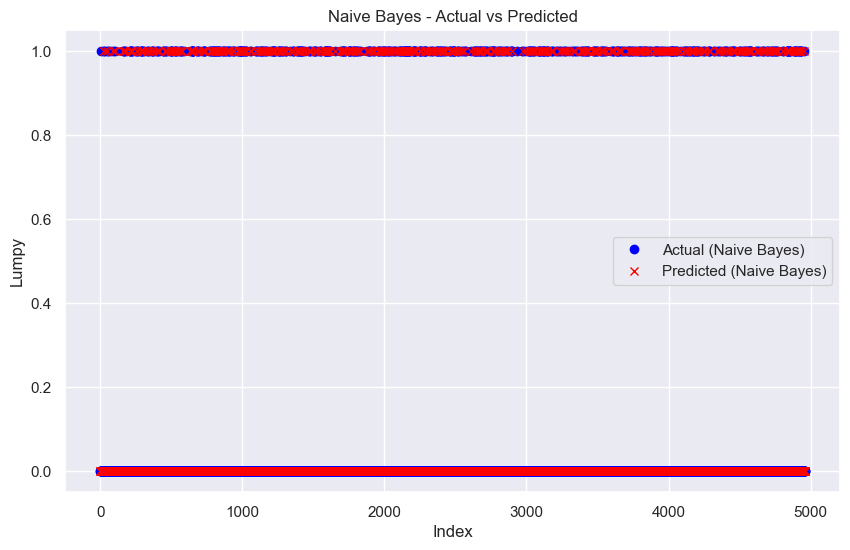

               y  region  country   cld   dtr    frs  pet    pre   tmn   tmp  \
0      22.437184       1        4  41.6  12.8   0.00  2.3    1.7  12.7  19.1   
1      22.986757       1       16  40.5  13.3   0.00  2.4    0.0  13.2  19.8   
2      23.610181       1       16  27.3  13.6   0.08  2.3    0.6   9.4  16.2   
3      43.882221       1        8  45.3  12.8  31.00  0.4    8.8 -22.5 -16.1   
4      43.834976       1        8  38.8  13.2  31.00  0.4   10.5 -20.4 -13.8   
...          ...     ...      ...   ...   ...    ...  ...    ...   ...   ...   
24798 -16.750000       2        0  68.8  12.0   0.00  3.6  172.0  17.7  23.7   
24799 -16.750000       2        0  68.8  11.8   0.00  3.6  170.0  18.0  23.9   
24800 -16.750000       2        0  68.8  11.6   0.00  3.6  167.5  18.3  24.1   
24801 -16.750000       2        0  68.8  11.5   0.00  3.6  169.5  18.5  24.2   
24802 -16.750000       2        0  67.5  11.4   0.00  3.7  172.1  18.7  24.4   

        tmx   vap    wet  elevation  X5

In [207]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

# --- Data Processing and Model Training ---
def train_and_save_model():
    # Load the dataset
    df = pd.read_csv('Lumpy skin disease data.csv')

    # Fill missing values in 'region' and 'country' columns with the most frequent value (mode)
    df['region'].fillna(df['region'].mode()[0], inplace=True)
    df['country'].fillna(df['country'].mode()[0], inplace=True)

    # Convert column names to lowercase and replace spaces with underscores
    # df.columns = [col.lower().replace(" ", "_") for col in df.columns]

    # Handle missing values (if any) in numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

    # Encode categorical columns using LabelEncoder
    label_encoders = {}
    categorical_columns = ['region', 'country']
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Select features and target
    features = df[['y', 'region', 'country', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation', 'X5_Ct_2010_Da']]
    target = df[['lumpy'] ] # Target is 'lumpy', categorical for classification

    # Standardize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Split into train and test sets
    features_train, features_test, target_train, target_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

    # Initialize and train the Naive Bayes model (GaussianNB)
    classifier_nb = GaussianNB()
    classifier_nb.fit(features_train, target_train)

    # Save Naive Bayes model and preprocessing objects
    joblib.dump(classifier_nb, 'naive_bayes_model.pkl')
    joblib.dump(label_encoders, 'label_encoders.pkl')
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(classifier_nb, 'naive_bayes_model.joblib')

    # Predictions
    nb_predictions = classifier_nb.predict(features_test)

    # Evaluate the model (accuracy and classification report)
    accuracy = accuracy_score(target_test, nb_predictions)
    print(f'Naive Bayes - Accuracy: {accuracy:.2f}')
    print(f'Classification Report:\n{classification_report(target_test, nb_predictions)}')

    # Plot Actual vs Predicted (for better visualization of classification results)
    plt.figure(figsize=(10,6))
    plt.plot(target_test.values, label='Actual (Naive Bayes)', color='blue', marker='o', linestyle='None')
    plt.plot(nb_predictions, label='Predicted (Naive Bayes)', color='red', marker='x', linestyle='None')
    plt.title('Naive Bayes - Actual vs Predicted')
    plt.xlabel('Index')
    plt.ylabel('Lumpy')
    plt.legend()
    plt.show()

    print(features)
    print(target)

# Call the function to train and save the model
train_and_save_model()


In [208]:
df.to_csv('Lumpy_skin_disease_modified.csv', index=False)

Naive Bayes - Accuracy: 100.00%
Confusion Matrix:
[[4354    0]
 [   0  607]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


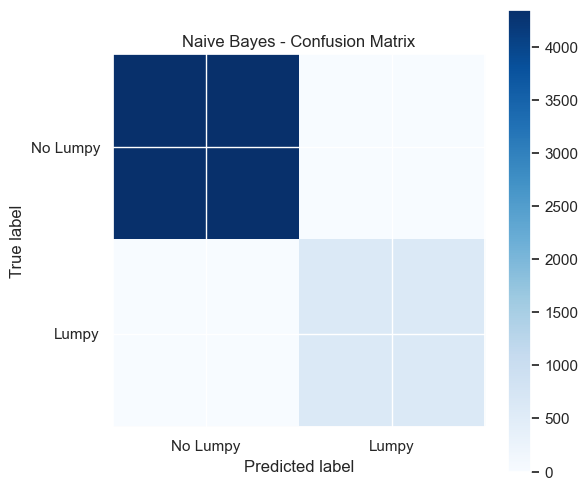

Index(['y', 'region', 'country', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn',
       'tmp', 'tmx', 'vap', 'wet', 'elevation', 'x5_ct_2010_da'],
      dtype='object')


In [209]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt

# --- Data Processing and Model Training ---
def train_and_save_model():
    # Load the dataset
    df = pd.read_csv('Lumpy skin disease data.csv')

    # Convert column names to lowercase and replace spaces with underscores
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]

    # Handle missing values (if any)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

    # Encode categorical columns using LabelEncoder
    label_encoders = {}
    categorical_columns = ['region', 'country']
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Select features and target
    features = df[['y','region', 'country', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet', 'elevation', 'x5_ct_2010_da']]
    target = df[['lumpy']]

    # Standardize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

    # Naive Bayes model
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    # Save the Naive Bayes model
    joblib.dump(nb_model, 'naive_bayes_model.pkl')
    
    # Save preprocessing objects
    joblib.dump(label_encoders, 'label_encoders.pkl')
    joblib.dump(scaler, 'scaler.pkl')

    # Make predictions
    nb_predictions = nb_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, nb_predictions)
    print(f'Naive Bayes - Accuracy: {accuracy * 100:.2f}%')

    # Confusion Matrix
    cm = confusion_matrix(y_test, nb_predictions)
    print(f'Confusion Matrix:\n{cm}')

    # Plot confusion matrix
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Naive Bayes - Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['No Lumpy', 'Lumpy'])
    plt.yticks(tick_marks, ['No Lumpy', 'Lumpy'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print(features.columns)

# Call the function to train and save the model
train_and_save_model()


In [210]:
import joblib

# Load the pre-trained Naive Bayes model, LabelEncoders, and Scaler
nb_model = joblib.load('naive_bayes_model.pkl')
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('scaler.pkl')

# Now, these objects can be used for prediction
